In [1]:
! pip install nltk

In [2]:
import logging
import pandas as pd
import numpy as np
from numpy import random
# import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import seaborn as sns
from bs4 import BeautifulSoup
%matplotlib inline

In [3]:
df = pd.read_csv('clean_data.csv').drop(columns='Unnamed: 0')
df = df[pd.notnull(df['target'])]
print(df.head(10))

                                                text  \
0  We understand that most people who reply immed...   
1  Welcome to /r/depression's check-in post - a p...   
2  Kind of proud of myself for making it through ...   
3  my parents when i wake up early: \n\noh my god...   
4  I hope someone will read this. I wanna tell my...   
5  i just had a conversation with my mother that ...   
6  Video games were the thing i always did whenev...   
7  Hi, i just wanted to tell all the people that ...   
8  Hey guys, hope you are having an amazing morni...   
9  i bet my post will be completely ignored. like...   

                                               title  target  
0  Our most-broken and least-understood rules is ...       1  
1  Regular Check-In Post. Plus, a reminder about ...       1  
2          No friends so im venting here. Just skip.       1  
3  my parents when i wake up late: this isn't nor...       1  
4                                Please, I need help       1  
5    

In [4]:
df['target'].value_counts()

1    3718
0    3373
Name: target, dtype: int64

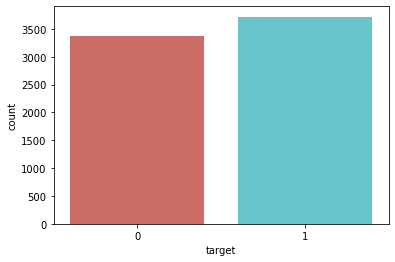

In [5]:
# plt.figure(figsize=(10,4))
# df.target.value_counts().plot(kind='bar');

sns.countplot(x=df['target'], data=df, palette='hls')
plt.show()

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arpitha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
#     text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['text'] = df['text'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

In [12]:
print(df['text'].apply(lambda x: len(x.split(' '))).sum())
print(df['title'].apply(lambda x: len(x.split(' '))).sum())

363903
32554


In [13]:
X = df.text + df.title
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

target_vars = ['0','1']
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=target_vars))

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs
accuracy 0.7716165413533834
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       988
           1       0.70      0.99      0.82      1140

    accuracy                           0.77      2128
   macro avg       0.84      0.75      0.75      2128
weighted avg       0.83      0.77      0.76      2128



In [28]:
x_handcode_test = ['I have been so angry, so aggressive, and so confrontational since my baby has been born. I’ve had so many mental breakdowns.. I’m the dad I thought dads are happy and normal after birth, I mean my wife is more normal than me and she gave birth. She’s doing great, yet I find myself feeling totally crazy, I hate everyone, I feel so stuck in my head and I am so depressed - I started drinking. All of these traits did not exist prior to our baby being born. What do I do',
                 'I hate pizza',
                 'Come and join us on /r/CasualConversation\'s official chat rooms! This time of year is perfect for coming together with old and new friends!\n\n \n\n\nHow to join [IRC]\nIt\'s very simple, and not as scary as it might sound:\n\nGo to https://webchat.snoonet.org/casualconversation\nEnter a nickname. [Please keep nicknames non-generic, or you will be forced to change your nickname again.]\n\nPress \"start\".\nDon\'t be shy, introduce yourself!\n\nThere\'s more info on our wiki: /r/CasualConversation/wiki/irc, and you can always find a link to the channel under the submit button and in the sidebar under resources.\n\n\n\nIf you wish to change your nickname, type the following and press enter:\n\n/nick newnickname\n\n \n\nIf you already have your own IRC client\nConnect to irc.snoonet.org on port 6667\n/join #casualconversation\n \n\nIf you need help\n\nIf you require help you can talk to one of the operators (channel mods, Some of them are sub mods). Their name will be prefixed with a \"@\" or \"%\", to privately message them just click on their name and then \"message\", or type the following and press enter:\n\nRules:\n\nStick within Snoonet guidelines.\nDon\'t post NSFW links.\nDon\'t harass users, don\'t use racial slurs, don\'t be a dick.\nSubreddit rules apply.\nDo not spam the bot. [If you want to test out what the bot can do, please PM the bot with /query gonzobot or click on the bot name gonzobot and do \'send private message. Feel free to ask for help here too. We hope to see you there, have fun!'
                ]
y_pred = nb.predict(x_handcode_test)
print(y_pred)

[1 1 1]


In [29]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter=1000)),
               ])
logreg.fit(X_train, y_train)

%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=target_vars))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
accuracy 0.8773496240601504
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       988
           1       0.89      0.88      0.88      1140

    accuracy                           0.88      2128
   macro avg       0.88      0.88      0.88      2128
weighted avg       0.88      0.88      0.88      2128



In [30]:
y_pred = logreg.predict(x_handcode_test)
print(y_pred)

[1 0 0]


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [35]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
y_pred = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
# print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
# report = classification_report(y_test, prediction_linear, output_dict=True)
# print('0: ', report['0'])
# print('1: ', report['1'])
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=target_vars))

accuracy 0.8914473684210527
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       988
           1       0.91      0.89      0.90      1140

    accuracy                           0.89      2128
   macro avg       0.89      0.89      0.89      2128
weighted avg       0.89      0.89      0.89      2128



In [37]:
y_pred = classifier_linear.predict(vectorizer.transform(x_handcode_test))
print(y_pred)

[1 0 0]
